In [117]:
# Uncomment to upgrade packages
!pip3 install pandas --upgrade --quiet
!pip3 install numpy --upgrade --quiet
!pip3 install scipy  --upgrade --quiet
!pip3 install statsmodels  --upgrade --quiet
!pip3 install seaborn  --upgrade --quiet
!pip3 install matplotlib  --upgrade --quiet
!pip3 install scikit-learn  --upgrade 
!pip install scikit-optimize  --quiet
!pip install apafib --upgrade  --quiet
!pip install pmlb --upgrade  --quiet




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

from time import time
from datetime import timedelta
from pmlb import fetch_data, dataset_names

# Exercici 3 Individual - Llista de problemes 2



In [119]:
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB

from sklearn.model_selection import GridSearchCV

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve

import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
pd.set_option('display.precision', 3)

In [120]:
def save_results(clf, X_test, y_test, nclf, df):
    if hasattr(clf, 'best_score_'):
        df.loc[nclf,'train XV acc'] = clf.best_score_
    else:
        df.loc[nclf,'train XV acc'] = np.nan
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (Fallo)'] = precision_score(y_test, clf.predict(X_test), average='macro')
    df.loc[nclf,'recall score (Fallo)'] = recall_score(y_test, clf.predict(X_test), average='macro')
    df.loc[nclf,'f1 score (Fallo)'] = f1_score(y_test, clf.predict(X_test), average='macro')
    return df

results_df = pd.DataFrame()

niter = 15
cv = 5

## a)


Load dataset y reordenar variables para tener la objetivo primera:


In [121]:
df = pd.read_csv('./tokyo1.tsv', sep='\t')
df.head()
cols = list(df.columns)
cols.remove('target')
cols.insert(0, 'target')

df = df.reindex(columns=cols)
df.head()

,cpu_avg_user,cpu_avg_sys,cpu_avg_busy,cpu_avg_wait,cpu_avg_idle,cpu_avg_waste,cpu_max_user,cpu_max_sys,cpu_max_busy,cpu_max_wait,...,net_avg_total,net_max_read,net_max_write,net_max_total,net_frac_busy,mem_swap,mem_fault,mem_tlbflush,syscall_total,target
0,0.015,0.342,0.356,0.423,0.127,0.550,0.023,0.406,0.423,0.570,...,689.70,197.40,710.40,0.083,0.0,10.570,0.133,1690.0,0.517,0
1,0.048,0.050,0.099,0.478,0.378,0.856,0.268,0.082,0.324,0.544,...,105.00,16.90,108.70,0.000,0.0,9.217,0.133,456.9,0.183,1
2,0.004,0.050,0.054,0.602,0.325,0.927,0.013,0.185,0.199,0.626,...,88.72,11.57,93.47,0.000,0.0,9.250,0.133,298.9,0.183,1
3,0.153,0.352,0.506,0.138,0.336,0.474,0.210,0.406,0.598,0.178,...,158.40,158.40,316.70,0.000,0.0,527.300,0.133,2470.0,5.283,1
4,0.003,0.017,0.020,0.010,0.966,0.976,0.011,0.046,0.056,0.011,...,42.33,16.23,58.57,0.000,0.0,9.233,0.133,320.6,0.183,1


,target,cpu_avg_user,cpu_avg_sys,cpu_avg_busy,cpu_avg_wait,cpu_avg_idle,cpu_avg_waste,cpu_max_user,cpu_max_sys,cpu_max_busy,...,net_avg_write,net_avg_total,net_max_read,net_max_write,net_max_total,net_frac_busy,mem_swap,mem_fault,mem_tlbflush,syscall_total
0,0,0.015,0.342,0.356,0.423,0.127,0.550,0.023,0.406,0.423,...,124.50,689.70,197.40,710.40,0.083,0.0,10.570,0.133,1690.0,0.517
1,1,0.048,0.050,0.099,0.478,0.378,0.856,0.268,0.082,0.324,...,21.15,105.00,16.90,108.70,0.000,0.0,9.217,0.133,456.9,0.183
2,1,0.004,0.050,0.054,0.602,0.325,0.927,0.013,0.185,0.199,...,16.58,88.72,11.57,93.47,0.000,0.0,9.250,0.133,298.9,0.183
3,1,0.153,0.352,0.506,0.138,0.336,0.474,0.210,0.406,0.598,...,43.51,158.40,158.40,316.70,0.000,0.0,527.300,0.133,2470.0,5.283
4,1,0.003,0.017,0.020,0.010,0.966,0.976,0.011,0.046,0.056,...,13.26,42.33,16.23,58.57,0.000,0.0,9.233,0.133,320.6,0.183


Dividimos el dataframe en X(variables) y y(variable objetivo)


In [122]:
X = df.drop(columns=['target'])
y = df[['target']]

In [123]:
X.head()
X.describe().T

,cpu_avg_user,cpu_avg_sys,cpu_avg_busy,cpu_avg_wait,cpu_avg_idle,cpu_avg_waste,cpu_max_user,cpu_max_sys,cpu_max_busy,cpu_max_wait,...,net_avg_write,net_avg_total,net_max_read,net_max_write,net_max_total,net_frac_busy,mem_swap,mem_fault,mem_tlbflush,syscall_total
0,0.015,0.342,0.356,0.423,0.127,0.550,0.023,0.406,0.423,0.570,...,124.50,689.70,197.40,710.40,0.083,0.0,10.570,0.133,1690.0,0.517
1,0.048,0.050,0.099,0.478,0.378,0.856,0.268,0.082,0.324,0.544,...,21.15,105.00,16.90,108.70,0.000,0.0,9.217,0.133,456.9,0.183
2,0.004,0.050,0.054,0.602,0.325,0.927,0.013,0.185,0.199,0.626,...,16.58,88.72,11.57,93.47,0.000,0.0,9.250,0.133,298.9,0.183
3,0.153,0.352,0.506,0.138,0.336,0.474,0.210,0.406,0.598,0.178,...,43.51,158.40,158.40,316.70,0.000,0.0,527.300,0.133,2470.0,5.283
4,0.003,0.017,0.020,0.010,0.966,0.976,0.011,0.046,0.056,0.011,...,13.26,42.33,16.23,58.57,0.000,0.0,9.233,0.133,320.6,0.183


,count,mean,std,min,25%,50%,75%,max
cpu_avg_user,959.0,4.170e-02,5.340e-02,1.542e-03,0.005,1.223e-02,5.874e-02,2.673e-01
cpu_avg_sys,959.0,6.482e+01,7.539e+02,1.069e-02,0.035,5.958e-02,2.980e-01,8.859e+03
cpu_avg_busy,959.0,6.486e+01,7.540e+02,1.223e-02,0.040,8.224e-02,3.595e-01,8.859e+03
cpu_avg_wait,959.0,3.509e-01,2.153e-01,0.000e+00,0.219,3.591e-01,4.625e-01,8.849e-01
cpu_avg_idle,959.0,7.431e+01,8.056e+02,1.500e-03,0.141,4.435e-01,5.995e-01,8.859e+03
cpu_avg_waste,959.0,7.467e+01,8.056e+02,6.253e-02,0.561,8.944e-01,9.469e-01,8.859e+03
cpu_max_user,959.0,8.396e-02,9.917e-02,2.833e-03,0.011,2.300e-02,1.515e-01,6.458e-01
cpu_max_sys,959.0,5.175e+02,6.032e+03,1.983e-02,0.072,1.190e-01,3.891e-01,7.087e+04
cpu_max_busy,959.0,5.176e+02,6.032e+03,2.083e-02,0.084,1.982e-01,4.562e-01,7.087e+04
cpu_max_wait,959.0,3.937e-01,2.373e-01,0.000e+00,0.263,3.903e-01,5.280e-01,9.646e-01


En y, clase 0 signifca que tuvo un fallo y classe 1 significa que no.

In [124]:
y.value_counts()

target
1         613
0         346
Name: count, dtype: int64

Particionamos de forma estratificada los datos en conjunto de entrenamiento y conjunto de test.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.head()

,cpu_avg_user,cpu_avg_sys,cpu_avg_busy,cpu_avg_wait,cpu_avg_idle,cpu_avg_waste,cpu_max_user,cpu_max_sys,cpu_max_busy,cpu_max_wait,...,net_avg_write,net_avg_total,net_max_read,net_max_write,net_max_total,net_frac_busy,mem_swap,mem_fault,mem_tlbflush,syscall_total
204,0.128,0.391,0.519,0.430,0.010,0.440,0.173,0.433,0.588,0.517,...,30.99,201.70,30.50,205.10,0.000,0.0,509.100,0.133,2176.0,7.650
474,0.003,0.021,0.025,0.003,0.967,0.970,0.011,0.037,0.046,0.004,...,20.63,41.92,36.55,77.05,0.000,0.0,9.217,0.133,373.3,0.183
265,0.015,0.085,0.100,0.860,0.017,0.877,0.032,0.141,0.165,0.934,...,28.79,172.10,35.38,174.70,0.000,0.0,20.380,0.133,712.9,0.717
561,0.025,0.375,0.400,0.436,0.093,0.529,0.034,0.437,0.459,0.546,...,98.92,475.00,203.40,502.70,0.167,0.0,27.930,0.133,1653.0,0.700
830,0.201,0.426,0.628,0.132,0.215,0.347,0.243,0.447,0.650,0.158,...,28.77,94.82,69.90,139.80,0.000,0.0,732.600,0.133,2489.0,6.800


### Visualización de las variables y sus correlaciones

Primero visualizamos los atributos:

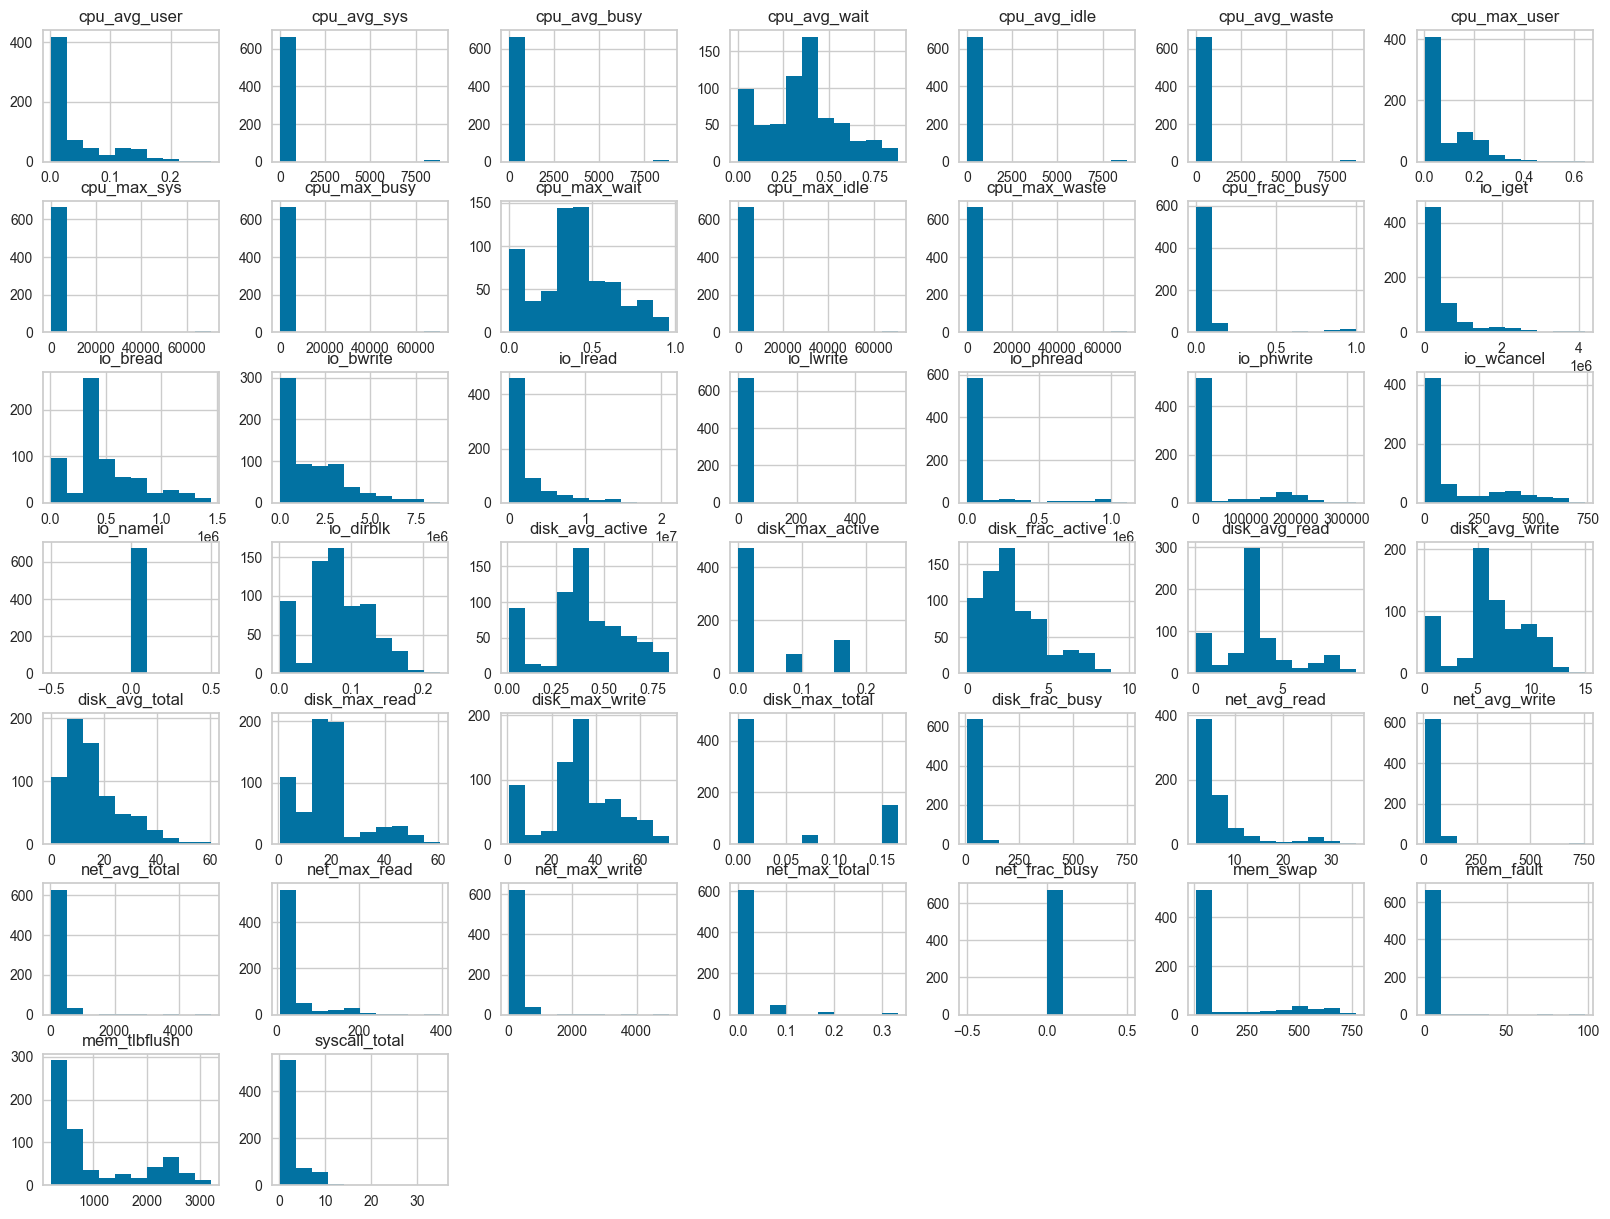

In [126]:
pd.DataFrame(X_train, columns = X.columns).hist(figsize=(20, 15));

Observamos su correlación:

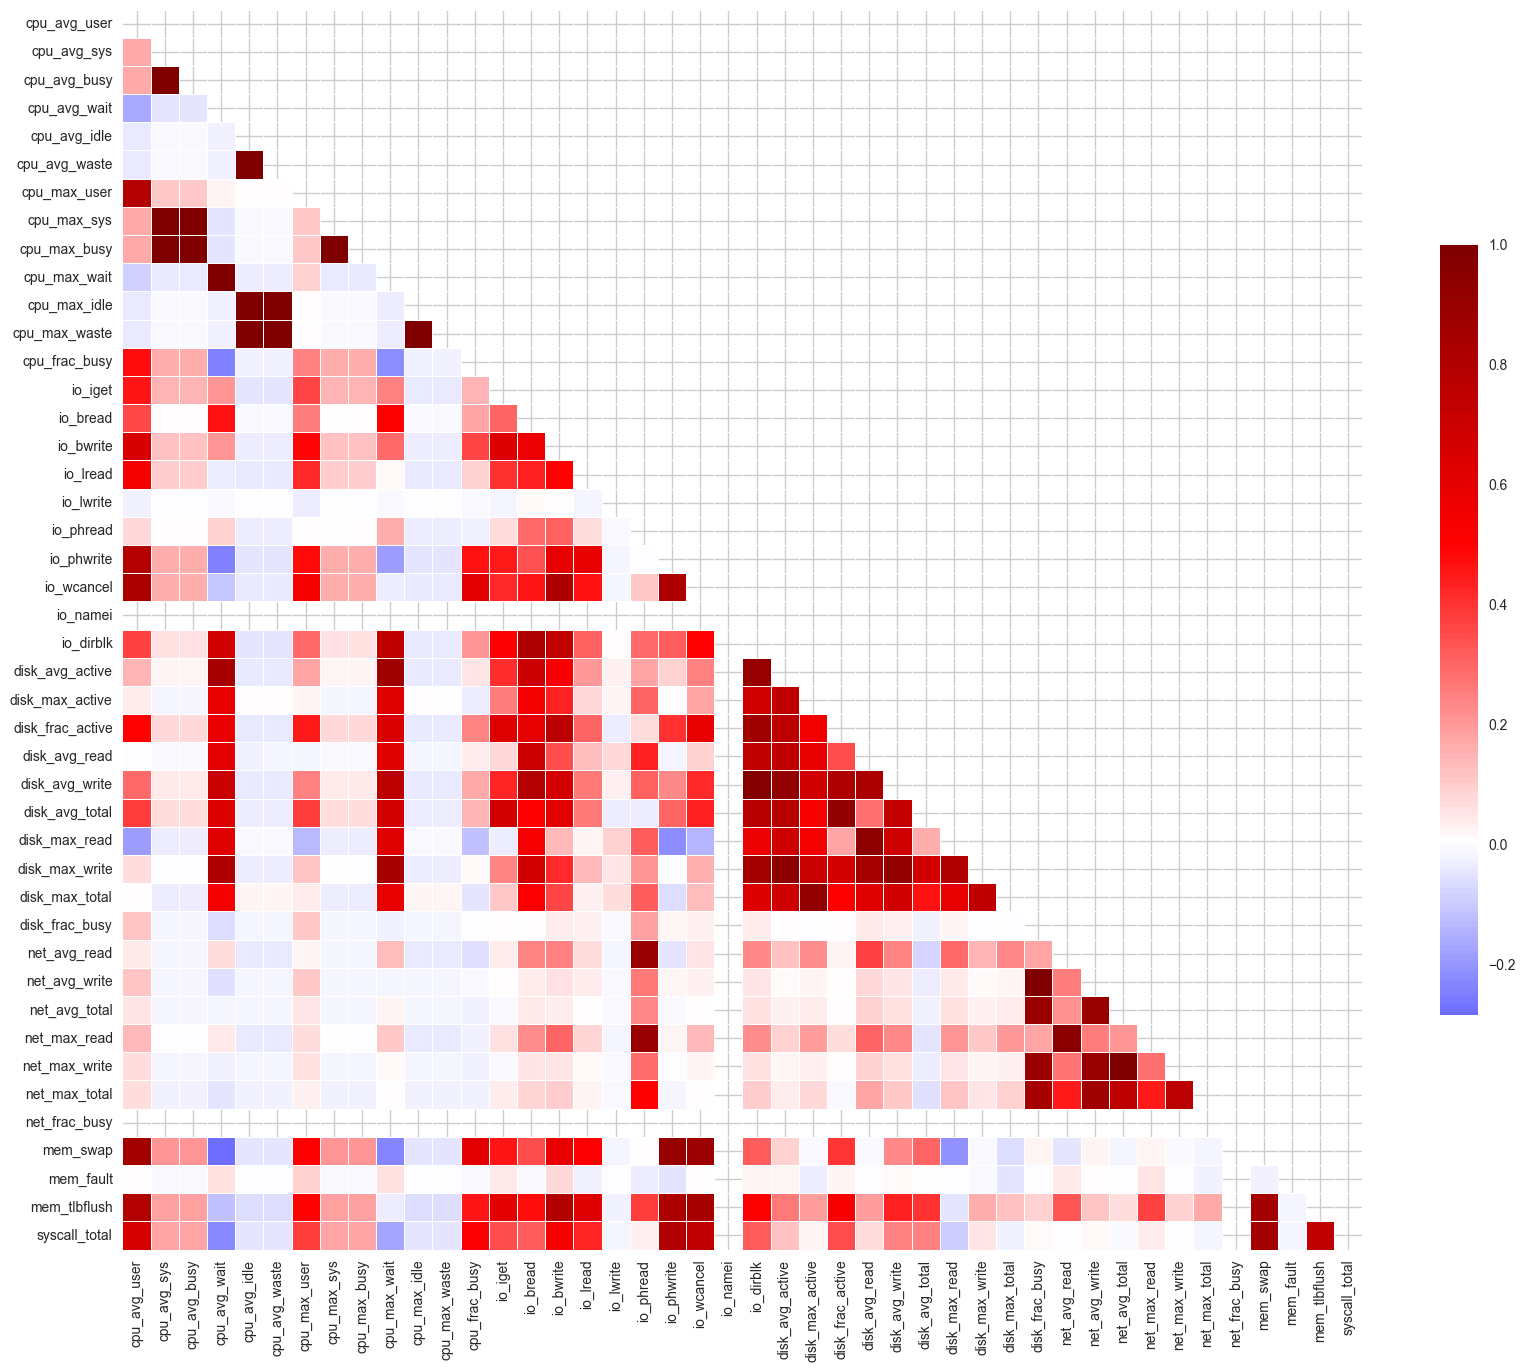

In [127]:
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Aparte de las correlaciones evidentes como las que hay entre variables_avg y variables_max, hay correlaciones interesantes como:
    - Las variables sobre "disk", estan fuertemente correlacionadas con cpu_avg_wait, cpu_max_wait, io_get, io_bread, io_write.
    - net_avg_write y net_max_write estan fuertemente correlacionadan con io_phread
    - 

Ahora vemos la relación entre variables y la clase mediante información mutua:

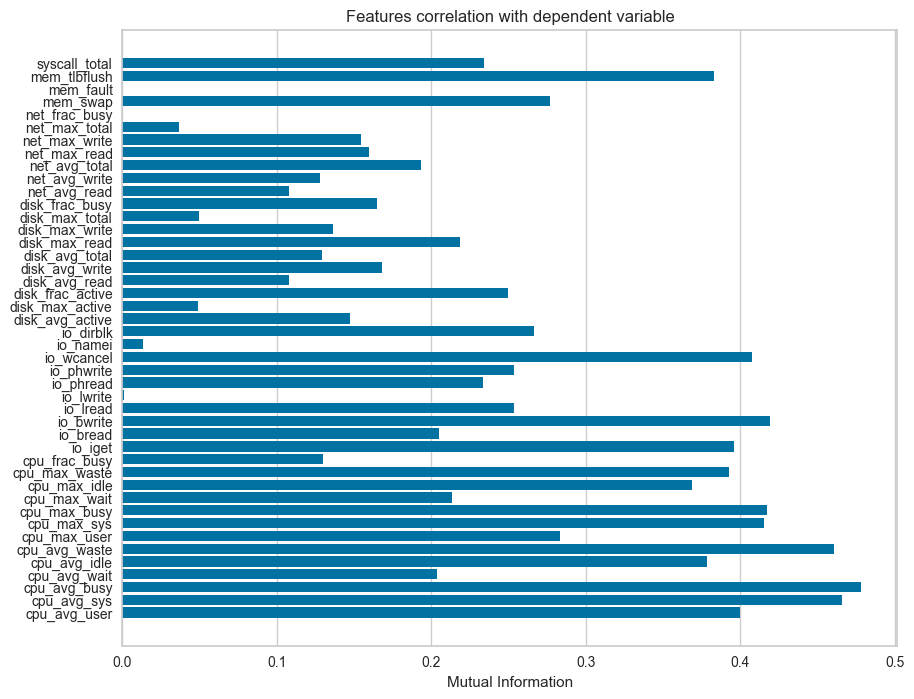

In [128]:
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns),method='mutual_info-classification');

Podemos visualizar como las variables de cpu parecen estar, en general, más correlacionadas con la variable objetivo.

In [129]:
X_train.isna().sum().sort_values(ascending=False)
y_train.isna().sum().sort_values(ascending=False)

cpu_avg_user        0
cpu_avg_sys         0
cpu_avg_busy        0
cpu_avg_wait        0
cpu_avg_idle        0
cpu_avg_waste       0
cpu_max_user        0
cpu_max_sys         0
cpu_max_busy        0
cpu_max_wait        0
cpu_max_idle        0
cpu_max_waste       0
cpu_frac_busy       0
io_iget             0
io_bread            0
io_bwrite           0
io_lread            0
io_lwrite           0
io_phread           0
io_phwrite          0
io_wcancel          0
io_namei            0
io_dirblk           0
disk_avg_active     0
disk_max_active     0
disk_frac_active    0
disk_avg_read       0
disk_avg_write      0
disk_avg_total      0
disk_max_read       0
disk_max_write      0
disk_max_total      0
disk_frac_busy      0
net_avg_read        0
net_avg_write       0
net_avg_total       0
net_max_read        0
net_max_write       0
net_max_total       0
net_frac_busy       0
mem_swap            0
mem_fault           0
mem_tlbflush        0
syscall_total       0
dtype: int64

target    0
dtype: int64

Podemos observar que no hay valores perdidos

### Reducción de dimensionalidad

In [130]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### PCA:

In [132]:
pca = PCA().fit(X_train);

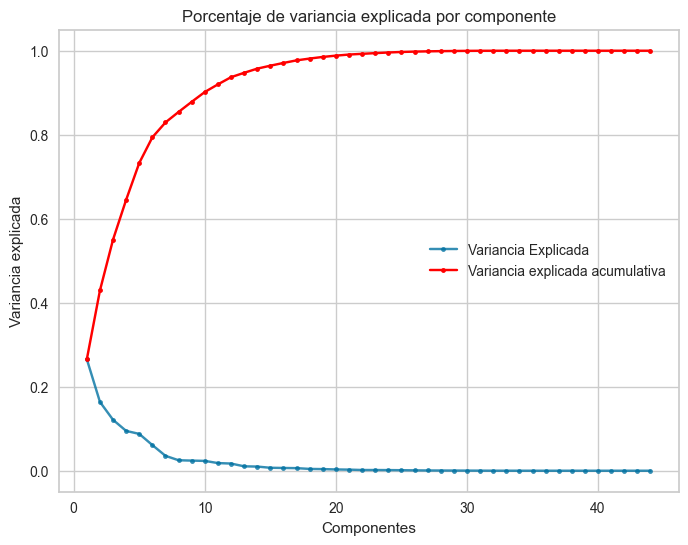

In [133]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

Podemos ver que la variancia explicada acumulada llega al 80% con 6 componentes, los dos primeros componentes acumulan casi un 50%, por ende podemos intentar visualizar los datos a partir de estos.

<Figure size 800x800 with 0 Axes>

<Axes: >

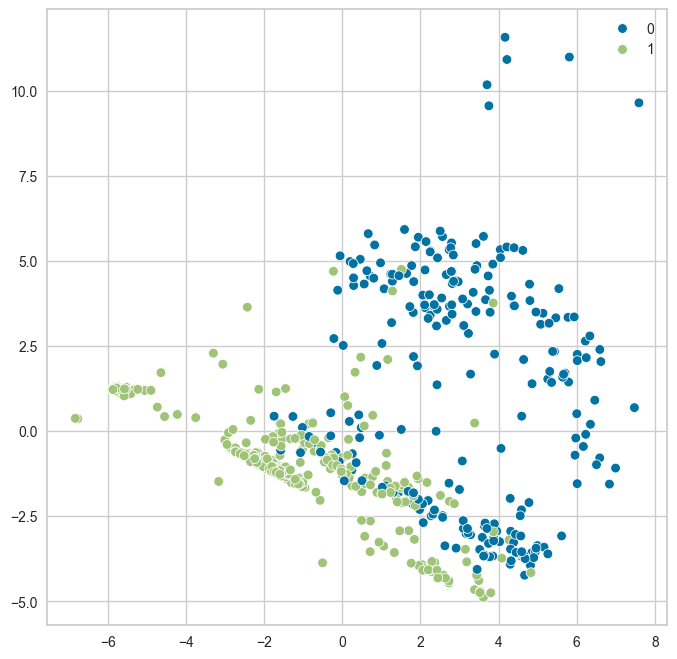

In [134]:
X_trans = pca.transform(X_train)
y_train_np = y_train.to_numpy()
y_train_np = y_train_np.ravel()
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train_np)

Podemos observar que las dos clases estan bastante diferenciadas incluso solo usando estos dos componentes.

#### Locally Linear Embedding:

In [135]:
from sklearn.manifold import LocallyLinearEmbedding

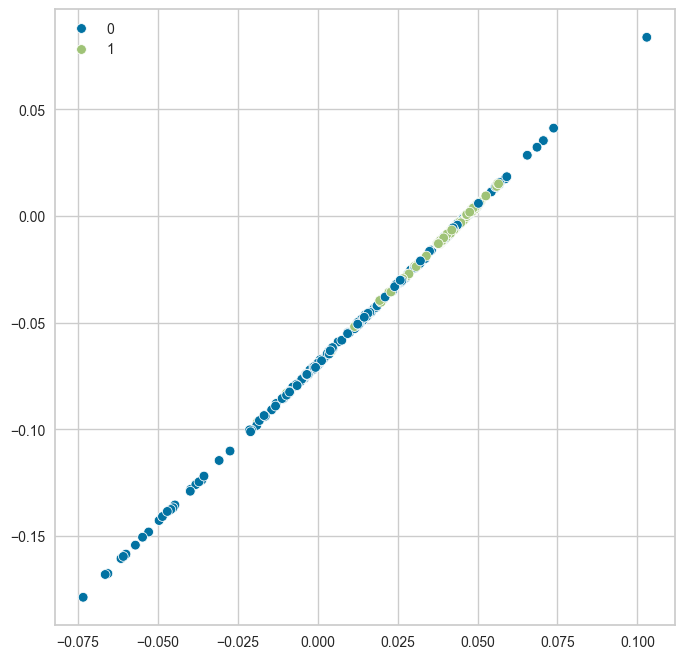

In [136]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=17)
X_trans = lle.fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train_np);

LLE no nos perimete diferenciar correctamente las dos clases considerando un número de vecinos tan bajo

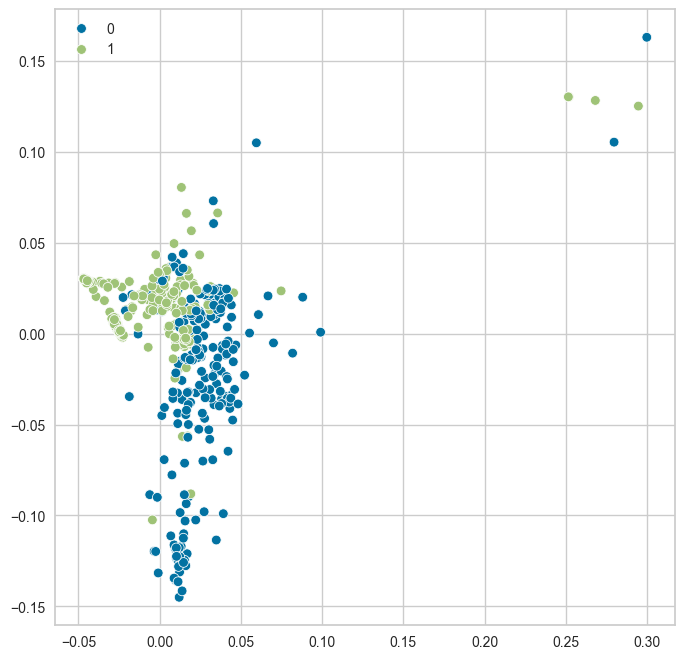

In [137]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=80)
X_trans = lle.fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train_np);

Sin embargo, si aumentamos el número de vecinos a considerar, se diferencian un poco mejor estas clases.

# b)

## Preprocesamiento

Todos los datos son numericos, no se necesita de realizar One Hot Enconding. Tampoco hay missings.

## LDA

In [138]:
lda = LinearDiscriminantAnalysis()
lda.best_score_ = np.mean(cross_val_score(lda,X_train,y_train,cv=10))
print(lda.best_score_)

0.9269754170324846


El acierto es bueno. En LDA no hay hiper parámetros que ajustar, así que ajustamos un modelo con los datos del conjunto de entrenamiento y lo probamos con el conjunto de test:

Priors: [0.36065574 0.63934426]
Means:

Intercepts:
Explained Variance Ratio
Coefs:


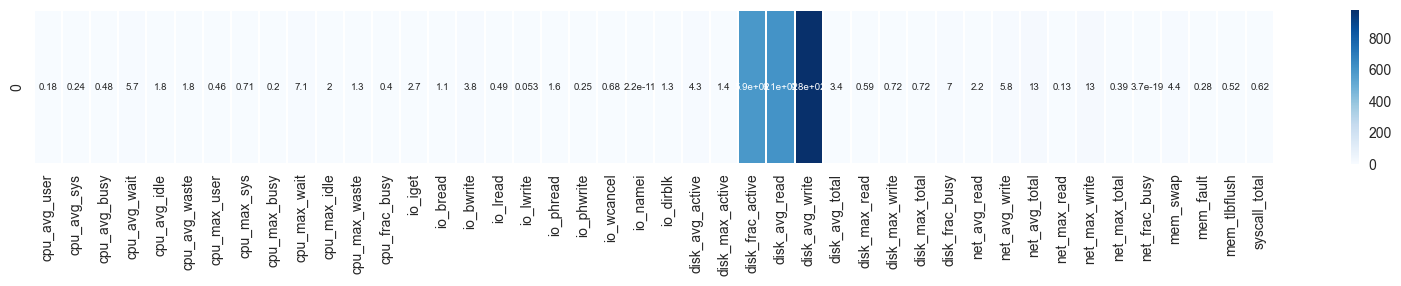

In [139]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

print('Priors:', lda_model.priors_)
print('Means:\n')
means =pd.DataFrame(lda_model.means_)
means.columns=X.columns
means

print('Intercepts:')
intercepts = pd.DataFrame(lda_model.intercept_)
intercepts

print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

print('Coefs:')
coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X.columns
# coefs.T

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.10,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':7});

Podemos observar que los atributos más importantes son:

    - disk_frac_active
    
    - disk_avg_read
    
    - disk_avg_write

Aplicamos el modelo a los datos de test para ver su calidad:

In [140]:
print(classification_report(y_test, lda_model.predict(X_test), target_names=['Fallo', 'No Fallo']))
results_df = save_results(lda_model, X_test, y_test, 'LDA', results_df)

              precision    recall  f1-score   support

       Fallo       0.92      0.86      0.89       104
    No Fallo       0.92      0.96      0.94       184

    accuracy                           0.92       288
   macro avg       0.92      0.91      0.91       288
weighted avg       0.92      0.92      0.92       288



Observamos la matriz de confusión:

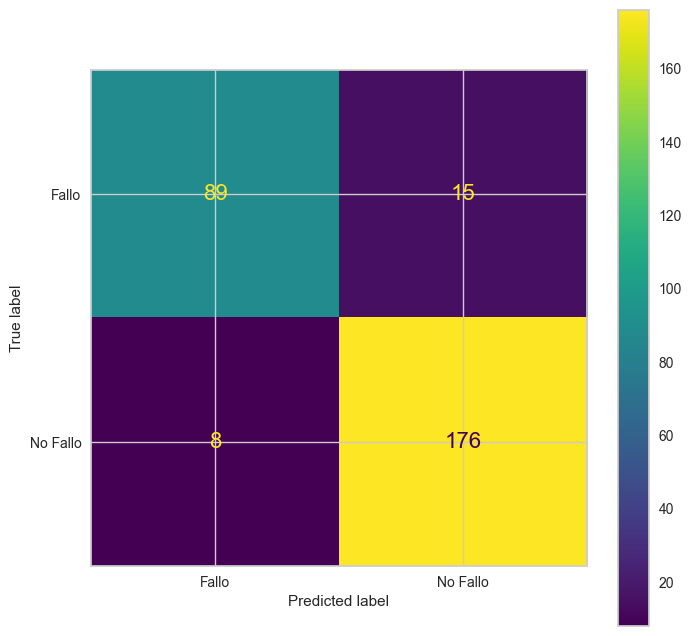

In [141]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lda_model, X_test,y_test, display_labels=['Fallo', 'No Fallo'], ax=plt.subplot());

Nos interesa detectar los Fallos, por lo que cometer errores prediciendo que un Fallo es un noFallo es peor que predecir que un noFallo es un Fallo. Por ende deberiamos decidir la probabilidad de decisión para deterimar la clasificación.

Podemos ver las consecuencias de elegir una probabilidad u otra mediante la curva ROC:

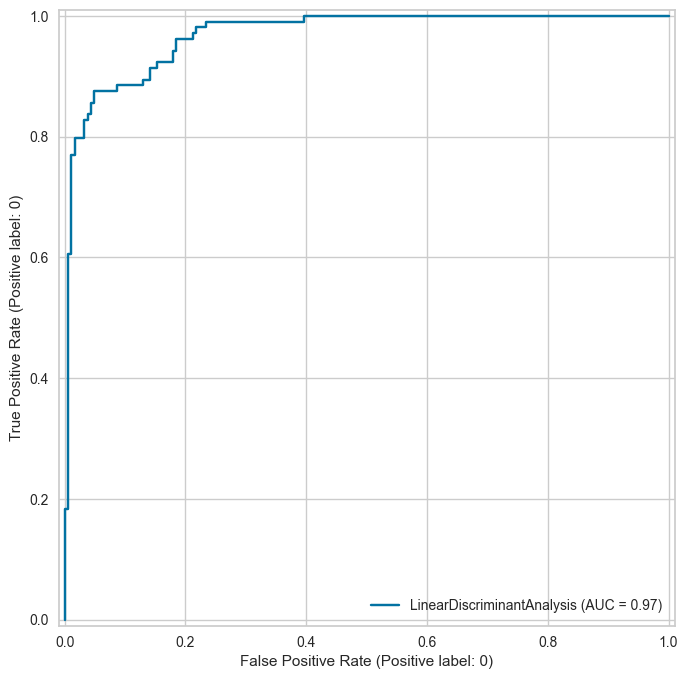

In [142]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lda_model, X_test,y_test, pos_label=0, ax=plt.subplot());

## Naïve Bayes

In [143]:
gnb = GaussianNB()
gnb.best_score_ = np.mean(cross_val_score(gnb,X_train,y_train,cv=10))
print(gnb.best_score_)

0.880838454784899


In [144]:
gnb_model = GaussianNB().fit(X_train, y_train)

print('Priors:', gnb_model.class_prior_)
print('Means:\n')
means =pd.DataFrame(gnb_model.theta_)
means.columns=X.columns
means

Priors: [0.36065574 0.63934426]
Means:



,cpu_avg_user,cpu_avg_sys,cpu_avg_busy,cpu_avg_wait,cpu_avg_idle,cpu_avg_waste,cpu_max_user,cpu_max_sys,cpu_max_busy,cpu_max_wait,...,net_avg_write,net_avg_total,net_max_read,net_max_write,net_max_total,net_frac_busy,mem_swap,mem_fault,mem_tlbflush,syscall_total
0,0.890,0.169,0.169,0.104,-0.008,-0.008,0.670,0.168,0.168,0.226,...,0.287,0.231,0.528,0.255,0.330,0.0,0.823,0.070,1.021,0.707
1,-0.502,-0.095,-0.095,-0.058,0.004,0.004,-0.378,-0.095,-0.095,-0.128,...,-0.162,-0.130,-0.298,-0.144,-0.186,0.0,-0.465,-0.039,-0.576,-0.399


In [145]:
print(classification_report(y_test, gnb_model.predict(X_test), target_names=['Fallo', 'NoFallo']))
results_df = save_results(gnb_model, X_test, y_test, 'GNB', results_df)

              precision    recall  f1-score   support

       Fallo       0.88      0.75      0.81       104
     NoFallo       0.87      0.94      0.90       184

    accuracy                           0.87       288
   macro avg       0.87      0.85      0.86       288
weighted avg       0.87      0.87      0.87       288



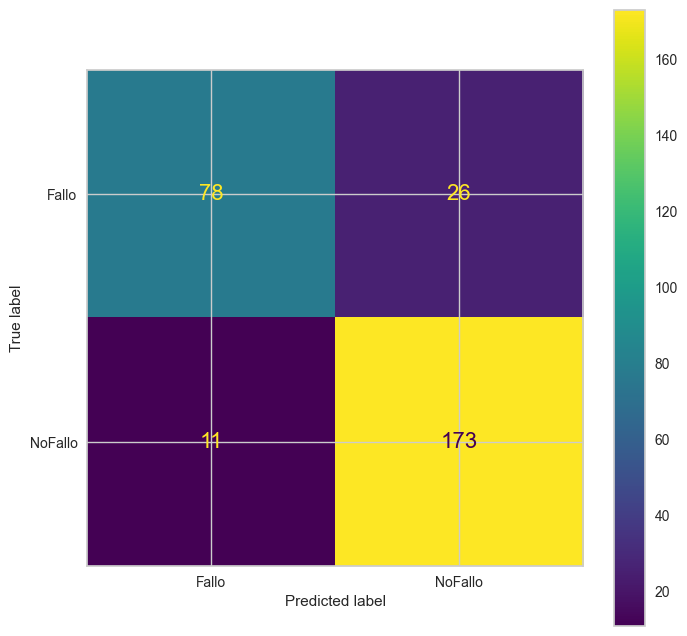

In [146]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(gnb_model, X_test,y_test, display_labels=['Fallo', 'NoFallo'], ax=plt.subplot());

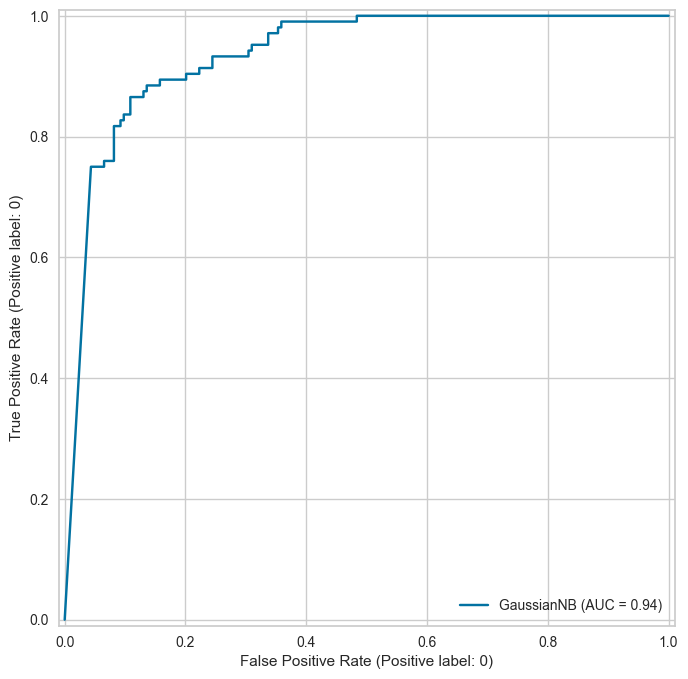

In [147]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(gnb_model, X_test,y_test, pos_label=0, ax=plt.subplot());

El resultado de Naïve Bayes es bueno, pero peor que el de LDA. 

## Regresión Logística

Realizamos una exploración en rejilla para optimizar los hiperparametros.

In [148]:
lr= LogisticRegression(max_iter=10000)
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train, y_train);

In [149]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
21,"{'C': 1.0, 'penalty': 'l2'}",0.936,1
13,"{'C': 0.0630957344480193, 'penalty': 'l2'}",0.934,2
17,"{'C': 0.25118864315095796, 'penalty': 'l2'}",0.934,3
23,"{'C': 1.9952623149688788, 'penalty': 'l2'}",0.934,3
15,"{'C': 0.12589254117941676, 'penalty': 'l2'}",0.933,5


Escogemos el hiperparametro: 'C': 1.0, 'penalty': 'l2'

In [150]:
print(lr_gs.best_score_)

0.935908691834943


Coefs:


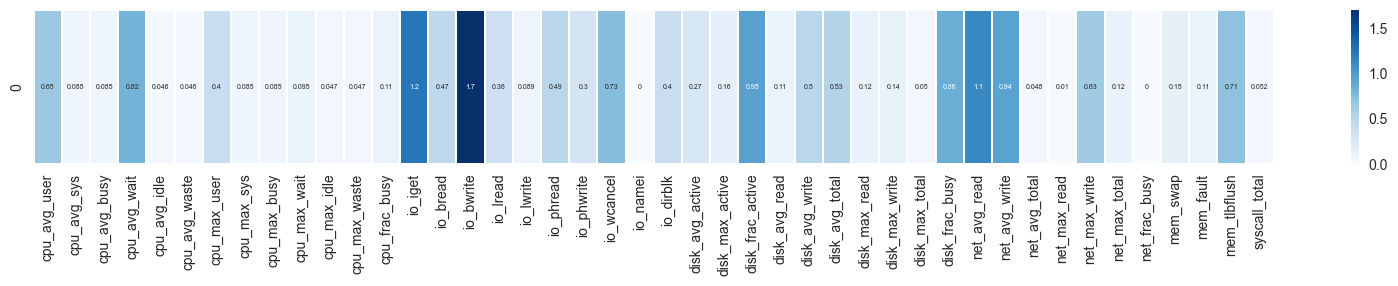

In [151]:
print('Coefs:')
coefs = pd.DataFrame(lr_gs.best_estimator_.coef_)
coefs.columns = X.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.20,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':5});

Ni los pesos ni los atributos con mayor importancia son los mismos que en LDA.
Podemos observar que hay bastantes más variables relevantes que en el modelo LDA, aunque las más destacadas son:

    - io_bwrite
    - io_iget
    - net_avg_read

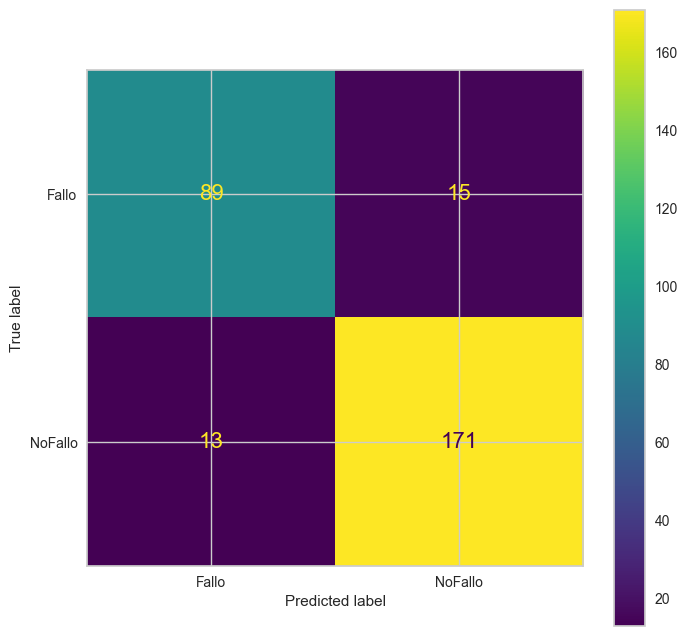

In [152]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test,y_test, display_labels=['Fallo', 'NoFallo'], ax=plt.subplot());

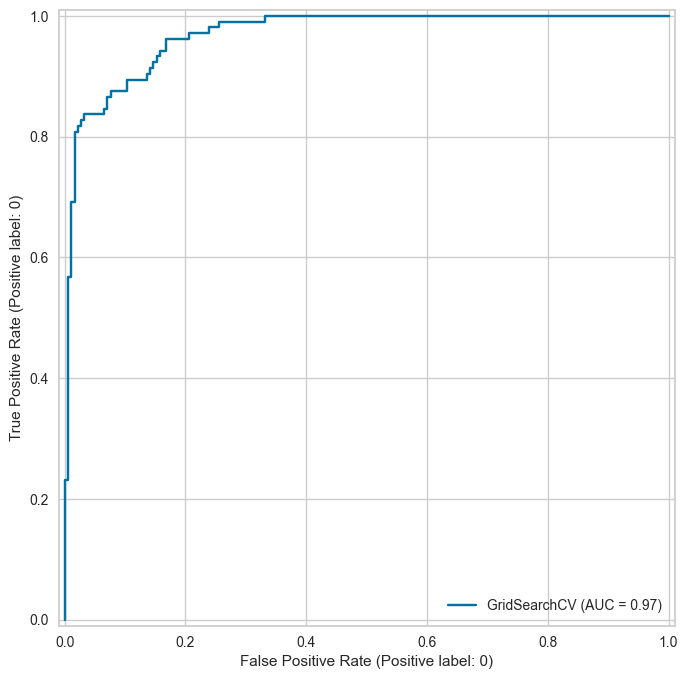

In [153]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lr_gs, X_test,y_test, pos_label=0, ax=plt.subplot());

Tanto el acierto en validación cruzada como el acierto en test son ligeramente mejores que en el modelo de LDA.

In [154]:
print(classification_report(y_test, lr_gs.predict(X_test), target_names=['Fallo', 'NoFallo']))
results_df = save_results(lr_gs, X_test, y_test, 'Logistic Regresion', results_df)

              precision    recall  f1-score   support

       Fallo       0.87      0.86      0.86       104
     NoFallo       0.92      0.93      0.92       184

    accuracy                           0.90       288
   macro avg       0.90      0.89      0.89       288
weighted avg       0.90      0.90      0.90       288



In [155]:
results_df.sort_values(by=['test acc'], ascending=False)

,train XV acc,test acc,precision score (Fallo),recall score (Fallo),f1 score (Fallo)
LDA,NaN,0.920,0.919,0.906,0.912
Logistic Regresion,0.936,0.903,0.896,0.893,0.894
GNB,NaN,0.872,0.873,0.845,0.856


Analizando las ROC curves, podemos visualizar que las tres siguen la misma forma, aunque en el modelo de Naive Bayes, el ratio de Falsos positivos aumenta más en el inicio que en los otros modelos.

Pôdemos apreciar que con los datos de entrenamiento el modelo de Logistic regresion es el que obtiene un mejor resultado, sin embargo, con los datos de test LDA es el mejor.

# c)

## Recursive Feature Elimination

In [156]:
from sklearn.feature_selection import RFECV

### LDA

In [157]:
selector_lda = RFECV(estimator=lda_model, step=1, cv=cv, scoring='accuracy')
selector_lda.fit(X_train, y_train)
X_train_lda_reduced = selector_lda.transform(X_train)
X_test_lda_reduced = selector_lda.transform(X_test)
X_train_lda_dataFrame_reduced = pd.DataFrame(X_train_lda_reduced)

RFECV(cv=5, estimator=LinearDiscriminantAnalysis(), scoring='accuracy')

In [158]:
lda_reduced = LinearDiscriminantAnalysis()
lda_reduced.best_score_ = np.mean(cross_val_score(lda_reduced,X_train_lda_reduced,y_train,cv=10))
print(lda_reduced.best_score_)

0.932945566286216


Priors: [0.36065574 0.63934426]
Means:

Intercepts:
Explained Variance Ratio
Coefs:


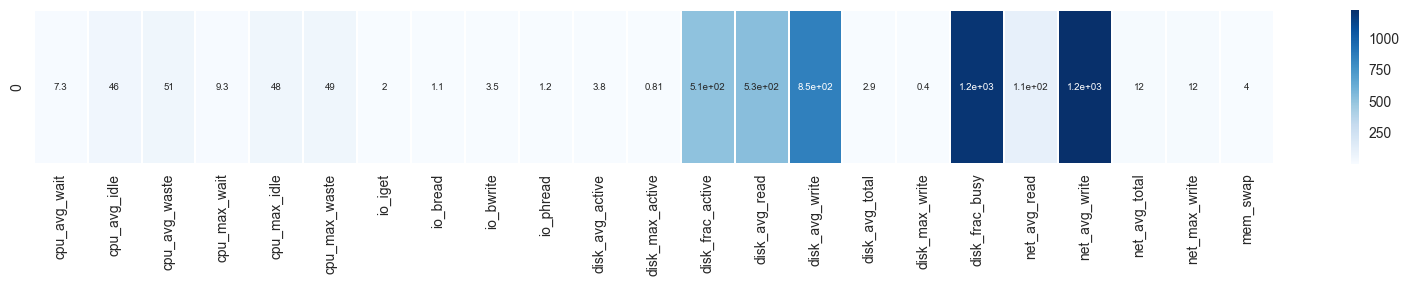

In [159]:
lda_model_reduced = LinearDiscriminantAnalysis().fit(X_train_lda_reduced, y_train)
print('Priors:', lda_model_reduced.priors_)
print('Means:\n')
means =pd.DataFrame(lda_model_reduced.means_)
means.columns = X_train_lda_dataFrame_reduced.columns
means

print('Intercepts:')
intercepts = pd.DataFrame(lda_model_reduced.intercept_)
intercepts

print('Explained Variance Ratio')
pd.DataFrame(lda_model_reduced.explained_variance_ratio_ )

print('Coefs:')
coefs = pd.DataFrame(lda_model_reduced.coef_)
coefs.columns = X.columns[selector_lda.support_]
# coefs.T

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.10,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':7});

In [160]:
print(classification_report(y_test, lda_model_reduced.predict(X_test_lda_reduced), target_names=['Fallo', 'NoFallo']))
results_df = save_results(lda_model_reduced, X_test_lda_reduced, y_test, 'LDA-reduced', results_df)

              precision    recall  f1-score   support

       Fallo       0.91      0.87      0.89       104
     NoFallo       0.93      0.95      0.94       184

    accuracy                           0.92       288
   macro avg       0.92      0.91      0.91       288
weighted avg       0.92      0.92      0.92       288



La importancia de las variables ha cambiado, antes las más relevantes eran:
    
    - disk_frac_active
    - disk_avg_read
    - disk_avg_write
Ahora, aunque estas siguen siendo importantes, las más relevantes pasan a ser:

    - net_avg_write
    - disk_frac_busy
    

Cabe destacar que el resultado obtenido ha sido ligeramente mejorado respecto al modelo LDA sin reducir el número de atributos, pero sigue siendo un poco peor que el modelo de Regresión Logística con todos los atributos. Si el tiempo de ejecución fuese excesivo, escogeriamos el modelo con menos atributos.

### Regresión Logística

In [161]:
selector_logistic = RFECV(estimator=lr_gs.best_estimator_, step=1, cv=cv, scoring='accuracy')
selector_logistic.fit(X_train, y_train)
X_train_logistic_reduced = selector_logistic.transform(X_train)
X_test_logistic_reduced = selector_logistic.transform(X_test)
selected_features_logistic = X.columns[selector_logistic.support_]
X_train_logistic_reduced_df = pd.DataFrame(X_train_logistic_reduced, columns=selected_features_logistic)
X_train_logistic_reduced_df.head()

RFECV(cv=5, estimator=LogisticRegression(C=np.float64(1.0), max_iter=10000),
      scoring='accuracy')

,cpu_avg_user,io_iget,io_bwrite,disk_frac_active,disk_frac_busy,net_avg_read,net_avg_write
0,1.589,0.381,0.871,1.887,-0.101,-0.418,-0.136
1,-0.707,-0.681,-1.034,-1.398,-0.276,-0.161,-0.285
2,-0.482,0.092,0.831,2.368,-0.138,-0.367,-0.168
3,-0.304,0.041,1.531,0.310,0.562,3.275,0.839
4,2.951,-0.266,-0.091,-0.437,-0.182,0.117,-0.168


Volvemos a crear un modelo ahora con los atributos reducidos

In [162]:
lr_reduced= LogisticRegression(max_iter=10000)
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs_reduced =  GridSearchCV(lr_reduced,param,cv=10, n_jobs=-1, refit=True)
lr_gs_reduced.fit(X_train_logistic_reduced, y_train);

In [163]:
show_html(pd.DataFrame(lr_gs_reduced.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
25,"{'C': 3.981071705534969, 'penalty': 'l2'}",0.937,1
27,"{'C': 7.943282347242813, 'penalty': 'l2'}",0.937,1
31,"{'C': 31.622776601683793, 'penalty': 'l2'}",0.937,1
29,"{'C': 15.848931924611142, 'penalty': 'l2'}",0.937,1
23,"{'C': 1.9952623149688788, 'penalty': 'l2'}",0.937,1


Coefs:


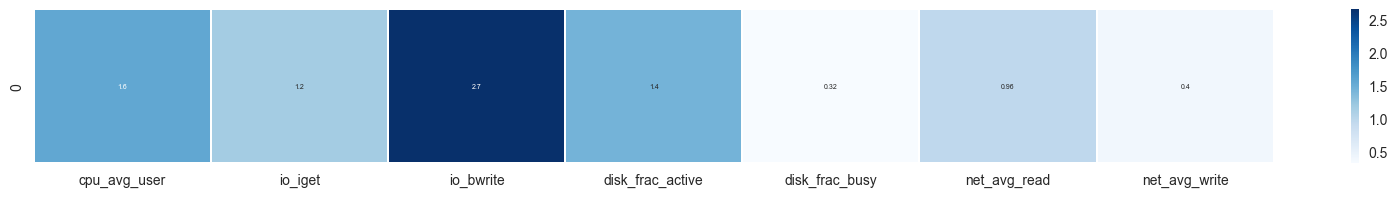

In [164]:
print('Coefs:')
X_train_logistic_reduced_dataFrame = pd.DataFrame(X_train_logistic_reduced)
coefs = pd.DataFrame(lr_gs_reduced.best_estimator_.coef_)
coefs.columns = X_train_logistic_reduced_df.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.20,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':5});

Podemos ver que se ha reducido drasticamente el número de atributos y que la importancia de estos se ha visto alterada, ya que antes las variables más relevantes eran:

    - io_bwrite
    - io_get
    - net_avg_read

Sin embargo ahora las más relevantes son:

    - io_brwite (que sigue siendo la más imporante)
    - cpu_avg_user
    - disk_frac_active

In [165]:
print(classification_report(y_test, lr_gs_reduced.predict(X_test_logistic_reduced), target_names=['Fallo', 'NoFallo']))
results_df = save_results(lr_gs_reduced, X_test_logistic_reduced, y_test, 'Logistic Regresion-Reduced', results_df)

              precision    recall  f1-score   support

       Fallo       0.89      0.87      0.88       104
     NoFallo       0.93      0.94      0.93       184

    accuracy                           0.91       288
   macro avg       0.91      0.90      0.91       288
weighted avg       0.91      0.91      0.91       288



In [166]:
results_df.sort_values(by=['test acc'], ascending=False)

,train XV acc,test acc,precision score (Fallo),recall score (Fallo),f1 score (Fallo)
LDA,NaN,0.920,0.919,0.906,0.912
LDA-reduced,NaN,0.920,0.918,0.908,0.913
Logistic Regresion-Reduced,0.937,0.913,0.908,0.903,0.905
Logistic Regresion,0.936,0.903,0.896,0.893,0.894
GNB,NaN,0.872,0.873,0.845,0.856


La mejora en LDA al reducir el número de atributos es mínima, sin embargo en el modelo de Logistic regresion es un poco más significativa.

# d)

In [167]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### LDA con datos PCA


In [168]:
lda_pca_model = LinearDiscriminantAnalysis().fit(X_train_pca, y_train)
lda_pca_model.best_score_ = np.mean(cross_val_score(lda_pca_model,X_train_pca,y_train,cv=10))
print(lda_pca_model.best_score_)

0.9269973661106233


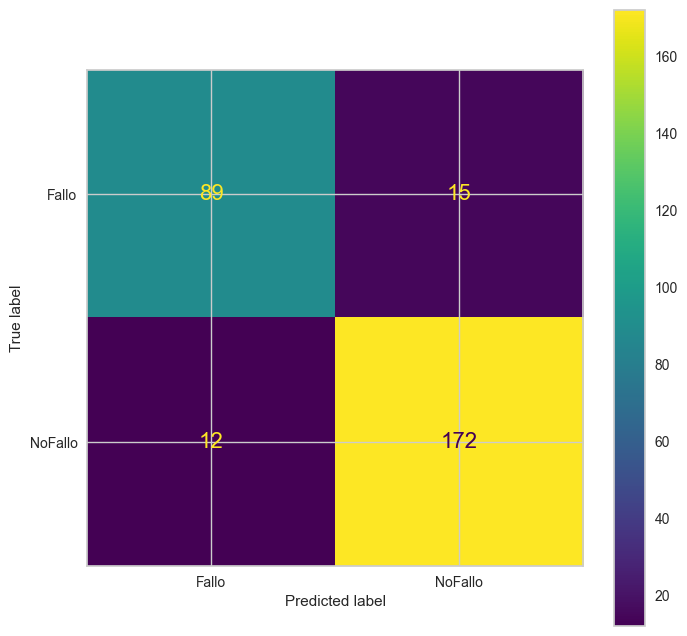

In [169]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lda_pca_model, X_test_pca,y_test, display_labels=['Fallo', 'NoFallo'], ax=plt.subplot());

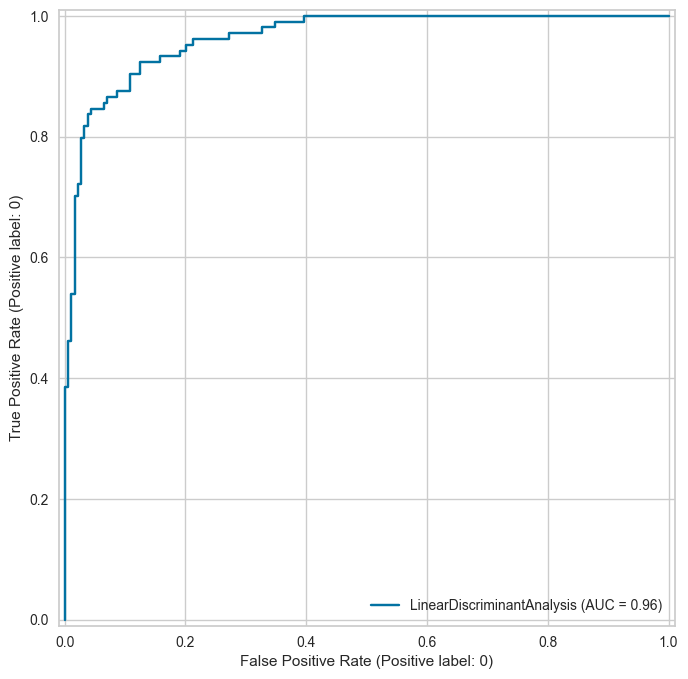

In [170]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lda_pca_model, X_test_pca,y_test, pos_label=0, ax=plt.subplot());

In [171]:
print(classification_report(y_test, lda_pca_model.predict(X_test_pca), target_names=['Fallo', 'NoFallo']))
results_df = save_results(lda_pca_model, X_test_pca, y_test, 'LDA-PCA', results_df)

              precision    recall  f1-score   support

       Fallo       0.88      0.86      0.87       104
     NoFallo       0.92      0.93      0.93       184

    accuracy                           0.91       288
   macro avg       0.90      0.90      0.90       288
weighted avg       0.91      0.91      0.91       288



### Regresión Logística con datos PCA


In [172]:
lr_pca = LogisticRegression(max_iter=10000)
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs_pca =  GridSearchCV(lr_pca,param,cv=10, n_jobs=-1, refit=True)
lr_gs_pca.fit(X_train_pca, y_train);

In [173]:
show_html(pd.DataFrame(lr_gs_pca.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
17,"{'C': 0.25118864315095796, 'penalty': 'l2'}",0.940,1
15,"{'C': 0.12589254117941676, 'penalty': 'l2'}",0.939,2
19,"{'C': 0.501187233627272, 'penalty': 'l2'}",0.937,3
13,"{'C': 0.0630957344480193, 'penalty': 'l2'}",0.937,3
21,"{'C': 1.0, 'penalty': 'l2'}",0.936,5


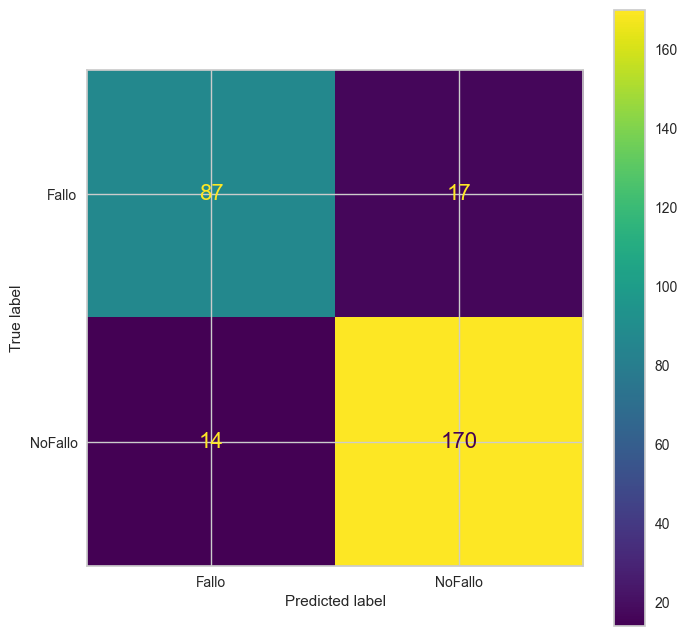

In [174]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_gs_pca, X_test_pca,y_test, display_labels=['Fallo', 'NoFallo'], ax=plt.subplot());

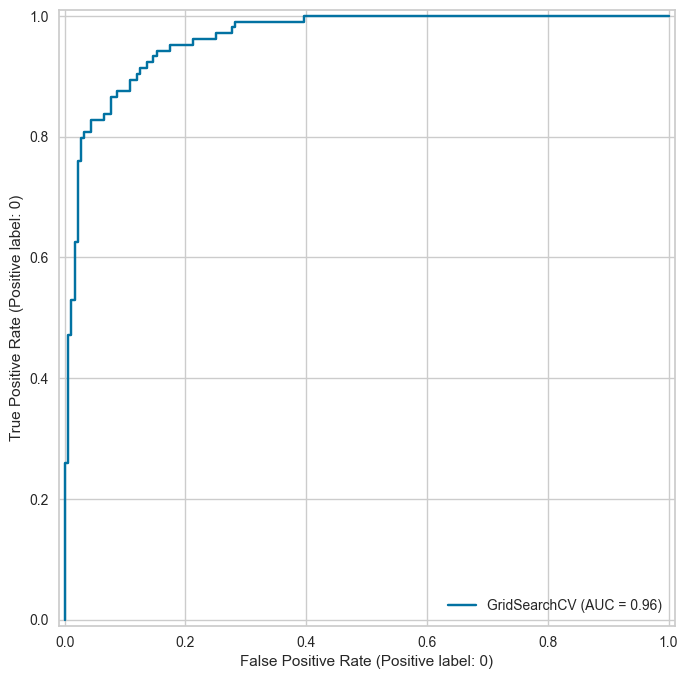

In [175]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lr_gs_pca, X_test_pca,y_test, pos_label=0, ax=plt.subplot());

In [176]:
print(classification_report(y_test, lr_gs_pca.predict(X_test_pca), target_names=['Fallo', 'NoFallo']))
results_df = save_results(lr_gs_pca, X_test_pca, y_test, 'Logistic Regresion-PCA', results_df)

              precision    recall  f1-score   support

       Fallo       0.86      0.84      0.85       104
     NoFallo       0.91      0.92      0.92       184

    accuracy                           0.89       288
   macro avg       0.89      0.88      0.88       288
weighted avg       0.89      0.89      0.89       288



In [177]:
results_df.sort_values(by=['test acc'], ascending=False)

,train XV acc,test acc,precision score (Fallo),recall score (Fallo),f1 score (Fallo)
LDA,NaN,0.920,0.919,0.906,0.912
LDA-reduced,NaN,0.920,0.918,0.908,0.913
Logistic Regresion-Reduced,0.937,0.913,0.908,0.903,0.905
LDA-PCA,0.927,0.906,0.900,0.895,0.898
Logistic Regresion,0.936,0.903,0.896,0.893,0.894
Logistic Regresion-PCA,0.940,0.892,0.885,0.880,0.883
GNB,NaN,0.872,0.873,0.845,0.856


Podemos observar, aunque los resultados no son malos, que la reducción de atributos mediante el uso de PCA no mejora el resultado obtenido por los modelos. Por ende, solo usariamos esta reducción en caso de no poder aplicar RFECV y en caso de necesitar un conjunto de datos más reducido para reducir el tiempo de computación.